# Srivatsan Srirangam

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# notebook imports



from sklearn import tree

from sklearn.metrics import classification_report
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Extras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Binary Classification for ratings

### Read the data

In [ ]:
df = pd.read_csv('beer_profile_and_ratings.csv')
#print(df.head())
print('\nDimensions of data frame:', df.shape)
for col in df.columns:
    print(col)

### Clean the data

In [3]:
#Remove unwanted columns
df = df.drop(columns=['Name','Style','Brewery','Beer Name (Full)','Description',])
# drop rows with NAs
df = df.dropna()
# output new dimensions
print('\nNew Dimensions of data frame:', df.shape)
list(df.columns)


New Dimensions of data frame: (3197, 20)


['ABV',
 'Min IBU',
 'Max IBU',
 'Astringency',
 'Body',
 'Alcohol',
 'Bitter',
 'Sweet',
 'Sour',
 'Salty',
 'Fruits',
 'Hoppy',
 'Spices',
 'Malty',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste',
 'review_overall',
 'number_of_reviews']

### Categorize the columns

In [4]:
review_threshold=3.5
df['taste_good'] = np.where(df['review_taste']>=review_threshold, 1, 0)
df['aroma_good'] = np.where(df['review_aroma']>=review_threshold, 1, 0)
df['palate_good'] = np.where(df['review_palate']>=review_threshold, 1, 0)
df['appearance_good'] = np.where(df['review_appearance']>=review_threshold, 1, 0)
df = df.drop(columns=['review_aroma','review_appearance','review_palate','review_taste','review_overall'])
list(df.columns)

['ABV',
 'Min IBU',
 'Max IBU',
 'Astringency',
 'Body',
 'Alcohol',
 'Bitter',
 'Sweet',
 'Sour',
 'Salty',
 'Fruits',
 'Hoppy',
 'Spices',
 'Malty',
 'number_of_reviews',
 'taste_good',
 'aroma_good',
 'palate_good',
 'appearance_good']

### Describe columns

In [5]:
df['number_of_reviews'].describe()

count    3197.000000
mean      233.284955
std       361.811847
min         1.000000
25%        23.000000
50%        93.000000
75%       284.000000
max      3290.000000
Name: number_of_reviews, dtype: float64

### Prepare for training

In [6]:
#Predictors
X = df.loc[:, [ 'ABV','Min IBU','Max IBU','Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']]
#Response
y = {}
y = df.taste_good
# 75% train 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print('\nX train dimensions:', X_train.shape, ' X test dimensions', X_test.shape)
print('\nY train dimensions:', y_train.shape, ' Y test dimensions', y_test.shape)


X train dimensions: (2397, 14)  X test dimensions (800, 14)

Y train dimensions: (2397,)  Y test dimensions (800,)


### Load Models 

In [7]:
models = [
    ['Logistic_Regression', LogisticRegression()],
    ['Naive_Bayes ', BernoulliNB()],
    ['kNN_Regression', KNeighborsClassifier(n_neighbors=5)],
    ['Decision_Tree', DecisionTreeClassifier()]
]

### Fit the models

In [8]:
clf_acc = {}


for clf, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Print the accuracies

In [9]:
#Print the accuracies
print("Accuracies for good taste")
for clf in clf_acc:
    print("Model:",clf, '\t',"Accuracy:", clf_acc[clf])

Accuracies for good taste
Model: Logistic_Regression 	 Accuracy: 0.79625
Model: Naive_Bayes  	 Accuracy: 0.7675
Model: kNN_Regression 	 Accuracy: 0.8125
Model: Decision_Tree 	 Accuracy: 0.76375


### Create and test Models for other responses

#### Response: Good aroma

In [11]:
#Response
y = {}
y = df.aroma_good
# 75% train 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print('\nX train dimensions:', X_train.shape, ' X test dimensions', X_test.shape)
print('\nY train dimensions:', y_train.shape, ' Y test dimensions', y_test.shape)

models = [
    ['Logistic_Regression', LogisticRegression()],
    ['Naive_Bayes ', BernoulliNB()],
    ['kNN_Regression', KNeighborsClassifier(n_neighbors=5)],
    ['Decision_Tree', DecisionTreeClassifier()]
]

clf_acc = {}


for clf, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)

#Print the accuracies
print("Accuracies for good aroma")
for clf in clf_acc:
    print("Model:",clf, '\t',"Accuracy:", clf_acc[clf])


X train dimensions: (2397, 14)  X test dimensions (800, 14)

Y train dimensions: (2397,)  Y test dimensions (800,)
Accuracies for good aroma
Model: Logistic_Regression 	 Accuracy: 0.7825
Model: Naive_Bayes  	 Accuracy: 0.705
Model: kNN_Regression 	 Accuracy: 0.81125
Model: Decision_Tree 	 Accuracy: 0.7675


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Response: Good Palate

In [12]:
#Response
y = {}
y = df.palate_good
# 75% train 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print('\nX train dimensions:', X_train.shape, ' X test dimensions', X_test.shape)
print('\nY train dimensions:', y_train.shape, ' Y test dimensions', y_test.shape)

models = [
    ['Logistic_Regression', LogisticRegression()],
    ['Naive_Bayes ', BernoulliNB()],
    ['kNN_Regression', KNeighborsClassifier(n_neighbors=5)],
    ['Decision_Tree', DecisionTreeClassifier()]
]

clf_acc = {}


for clf, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)

#Print the accuracies
print("Accuracies for good palate")
for clf in clf_acc:
    print("Model:",clf, '\t',"Accuracy:", clf_acc[clf])


X train dimensions: (2397, 14)  X test dimensions (800, 14)

Y train dimensions: (2397,)  Y test dimensions (800,)
Accuracies for good palate
Model: Logistic_Regression 	 Accuracy: 0.79125
Model: Naive_Bayes  	 Accuracy: 0.74625
Model: kNN_Regression 	 Accuracy: 0.81
Model: Decision_Tree 	 Accuracy: 0.755


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Response: Good appearance

In [13]:
#Response
y = {}
y = df.appearance_good
# 75% train 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print('\nX train dimensions:', X_train.shape, ' X test dimensions', X_test.shape)
print('\nY train dimensions:', y_train.shape, ' Y test dimensions', y_test.shape)

models = [
    ['Logistic_Regression', LogisticRegression()],
    ['Naive_Bayes ', BernoulliNB()],
    ['kNN_Regression', KNeighborsClassifier(n_neighbors=5)],
    ['Decision_Tree', DecisionTreeClassifier()]
]

clf_acc = {}


for clf, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)

#Print the accuracies
print("Accuracies for good appearance")
for clf in clf_acc:
    print("Model:",clf, '\t',"Accuracy:", clf_acc[clf])


X train dimensions: (2397, 14)  X test dimensions (800, 14)

Y train dimensions: (2397,)  Y test dimensions (800,)
Accuracies for good appearance
Model: Logistic_Regression 	 Accuracy: 0.8775
Model: Naive_Bayes  	 Accuracy: 0.8475
Model: kNN_Regression 	 Accuracy: 0.885
Model: Decision_Tree 	 Accuracy: 0.835


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Use knn for all since it has the highest accuracy

In [14]:
# 75% train 25% test
X = df.loc[:, [ 'ABV','Min IBU','Max IBU','Astringency','Body','Alcohol','Bitter',
               'Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']]

# Different model for different responses but all are knn
clf_taste = KNeighborsClassifier(n_neighbors = 5)
clf_aroma = KNeighborsClassifier(n_neighbors = 5)
clf_palate = KNeighborsClassifier(n_neighbors = 5)
clf_appearance = KNeighborsClassifier(n_neighbors = 5)

# Good taste
y = df.taste_good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
clf_taste.fit(X_train, y_train)
# Good aroma
y = df.aroma_good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
clf_aroma.fit(X_train, y_train)
# Good palate
y = df.palate_good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
clf_palate.fit(X_train, y_train)
# Good appearance
y = df.appearance_good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
clf_appearance.fit(X_train, y_train)


KNeighborsClassifier()

### Predict using new data which was not in the data frame

In [17]:
# ABV=3.3
# Min_IBU=40
# Max_IBU=100
# Astringency=31
# Body=40
# Alcohol=66
# Bitter=47
# Sweet=55
# Sour=16
# Salty=4
# Fruits=47
# Hoppy=40
# Spices=20
# Malty=9

df_test_new= pd.read_csv('beer_profile_and_ratings_test.csv')
taste_pred = clf_taste.predict(df_test_new)
aroma_pred = clf_aroma.predict(df_test_new)
palate_pred = clf_palate.predict(df_test_new)
appearance_pred = clf_appearance.predict(df_test_new)

df_test_new_results=df_test_new.copy(deep=True)
df_test_new_results["taste_good"]=taste_pred
df_test_new_results["aroma_good"]=aroma_pred
df_test_new_results["palate_good"]=palate_pred
df_test_new_results["appearance_good"]=appearance_pred
display(df_test_new_results)
# print("Taste good=",taste_pred)
# print("Aroma good=",aroma_pred)
# print("Palate good=",palate_pred)
# print("Appearance good=",appearance_pred)

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,taste_good,aroma_good,palate_good,appearance_good
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,1,1,1,1
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,0,0,1,1
2,8.8,24,40,14,48,18,84,80,90,3,44,53,15,99,1,1,1,1


## Multi-class "style" classification

In [178]:
df = pd.read_csv('beer_profile_and_ratings.csv')
#print(df.head())
print('\nDimensions of data frame:', df.shape)
for col in df.columns:
    print(col)


Dimensions of data frame: (3197, 25)
Name
Style
Brewery
Beer Name (Full)
Description
ABV
Min IBU
Max IBU
Astringency
Body
Alcohol
Bitter
Sweet
Sour
Salty
Fruits
Hoppy
Spices
Malty
review_aroma
review_appearance
review_palate
review_taste
review_overall
number_of_reviews


In [48]:
#Remove unwanted columns
df = df.drop(columns=['Name','Brewery','Beer Name (Full)','Description',
'review_aroma',
'review_appearance',
'review_palate',
'review_taste',
'review_overall',
'number_of_reviews'])
# drop rows with NAs
df = df.dropna()
# output new dimensions
print('\nNew Dimensions of data frame:', df.shape)
list(df.columns)


New Dimensions of data frame: (3197, 15)


['Style',
 'ABV',
 'Min IBU',
 'Max IBU',
 'Astringency',
 'Body',
 'Alcohol',
 'Bitter',
 'Sweet',
 'Sour',
 'Salty',
 'Fruits',
 'Hoppy',
 'Spices',
 'Malty']

In [49]:
print(df['Style'].unique().size)

111


In [54]:
#Predictors
X = df.loc[:, [ 'ABV','Min IBU','Max IBU','Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']]
#Response
y = df.Style
# 75% train 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print('\nX train dimensions:', X_train.shape, ' X test dimensions', X_test.shape)
print('\nY train dimensions:', y_train.shape, ' Y test dimensions', y_test.shape)


X train dimensions: (2397, 14)  X test dimensions (800, 14)

Y train dimensions: (2397,)  Y test dimensions (800,)


In [55]:
models = [
    ['Logistic_Regression', LogisticRegression()],
    ['Naive_Bayes ', BernoulliNB()],
    ['kNN_Regression', KNeighborsClassifier(n_neighbors=5)],
    ['Decision_Tree', DecisionTreeClassifier(random_state=1234)],
    ['Random Forest Classifier', RandomForestClassifier(n_estimators=1000)]
]

In [179]:
clf_acc = {}

for clf, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)

In [180]:
for clf in clf_acc:
    print("Model:",clf, '\t',"Accuracy:", clf_acc[clf])

Model: Logistic_Regression 	 Accuracy: 0.8075
Model: Naive_Bayes  	 Accuracy: 0.12625
Model: kNN_Regression 	 Accuracy: 0.86625
Model: Decision_Tree 	 Accuracy: 0.75
Model: Random Forest Classifier 	 Accuracy: 0.8675


### Try XGBoost

In [24]:
xg_reg = xgb.XGBClassifier

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [32]:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [33]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [35]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [36]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [37]:
xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [44]:
# Apply preprocessing
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218
)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)


0.83

In [46]:
# Score
print(accuracy_score(y_test, preds))

0.83


## Clustering

In [3]:
df = pd.read_csv('beer_profile_and_ratings.csv')
#print(df.head())
print('\nDimensions of data frame:', df.shape)
for col in df.columns:
    print(col)


Dimensions of data frame: (3197, 25)
Name
Style
Brewery
Beer Name (Full)
Description
ABV
Min IBU
Max IBU
Astringency
Body
Alcohol
Bitter
Sweet
Sour
Salty
Fruits
Hoppy
Spices
Malty
review_aroma
review_appearance
review_palate
review_taste
review_overall
number_of_reviews


In [4]:
#Remove unwanted columns
df_clustering = df.drop(columns=['Name','Brewery','Style','Beer Name (Full)','Description',
'review_aroma',
'review_appearance',
'review_palate',
'review_taste',
'review_overall',
'number_of_reviews'])
styles=df['Style']
# drop rows with NAs
df_clustering = df_clustering.dropna()
# output new dimensions
print('\nNew Dimensions of data frame:', df_clustering.shape)
list(df_clustering.columns)


New Dimensions of data frame: (3197, 14)


['ABV',
 'Min IBU',
 'Max IBU',
 'Astringency',
 'Body',
 'Alcohol',
 'Bitter',
 'Sweet',
 'Sour',
 'Salty',
 'Fruits',
 'Hoppy',
 'Spices',
 'Malty']

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clustering_scaled=df_clustering
for col in df_clustering_scaled.columns:
    scaler.fit(df_clustering_scaled[[col]])
    df_clustering_scaled[col] = scaler.transform(df_clustering_scaled[[col]])

In [7]:
km = KMeans(n_clusters=111,random_state=1234)
y_predicted = km.fit_predict(df_clustering_scaled)
print(y_predicted)

[ 13  66  42 ... 106  44  12]


In [8]:
from sklearn.metrics import silhouette_score


In [9]:
print(df_clustering_scaled.shape[0])

3197


In [10]:
min_clusters=2
max_clusters=150
krng=range(min_clusters,max_clusters)
sil_score=list()
k_means_labels_list=list()
sse_list=list()
cluster_centers=list()
for num_clusters in krng:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,random_state=123)
    kmeans.fit(df_clustering_scaled)
    cluster_centers.append(kmeans.cluster_centers_)
    k_means_labels_list.append(kmeans.labels_)
    sse_list.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_clustering_scaled, kmeans.labels_))

### Knee Locator

In [12]:
from kneed import KneeLocator

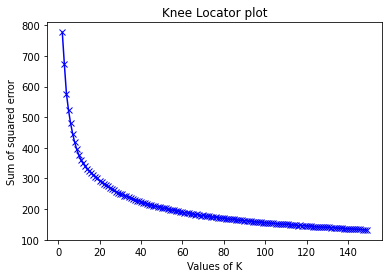

In [13]:
plt.plot(krng,sse_list,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared error') 
plt.title('Knee Locator plot')
plt.show()

In [14]:
kn = KneeLocator(x=krng, 
                 y=sse_list, 
                 curve='convex', 
                 direction='decreasing')


optimal_n_clusters_knee_locator=kn.knee
print("Optimal Number Of clusters =",optimal_n_clusters_knee_locator)

Optimal Number Of clusters = 28


### Sihouette Analysis

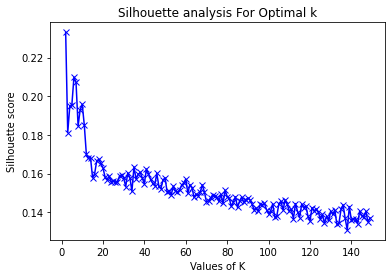

In [15]:
plt.plot(krng,sil_score,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [82]:
max_sil_score=max(sil_score)
optimal_n_clusters_sil_analysis = min_clusters + sil_score.index(max_sil_score)
print("Optimal Number Of clusters=",optimal_n_clusters_sil_analysis," Sil score=",max_sil_score)

Optimal Number Of clusters= 2  Sil score= 0.23307802687129345


### Plot Cluster Data

In [16]:
num_clusters=optimal_n_clusters_knee_locator
labels_for_optimal_cluster_value=k_means_labels_list[num_clusters-min_clusters]
cluster_centers_for_optimal_value= np.array(cluster_centers[num_clusters-min_clusters])

In [17]:
print(df_clustering_scaled.columns)

Index(['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty'],
      dtype='object')


28


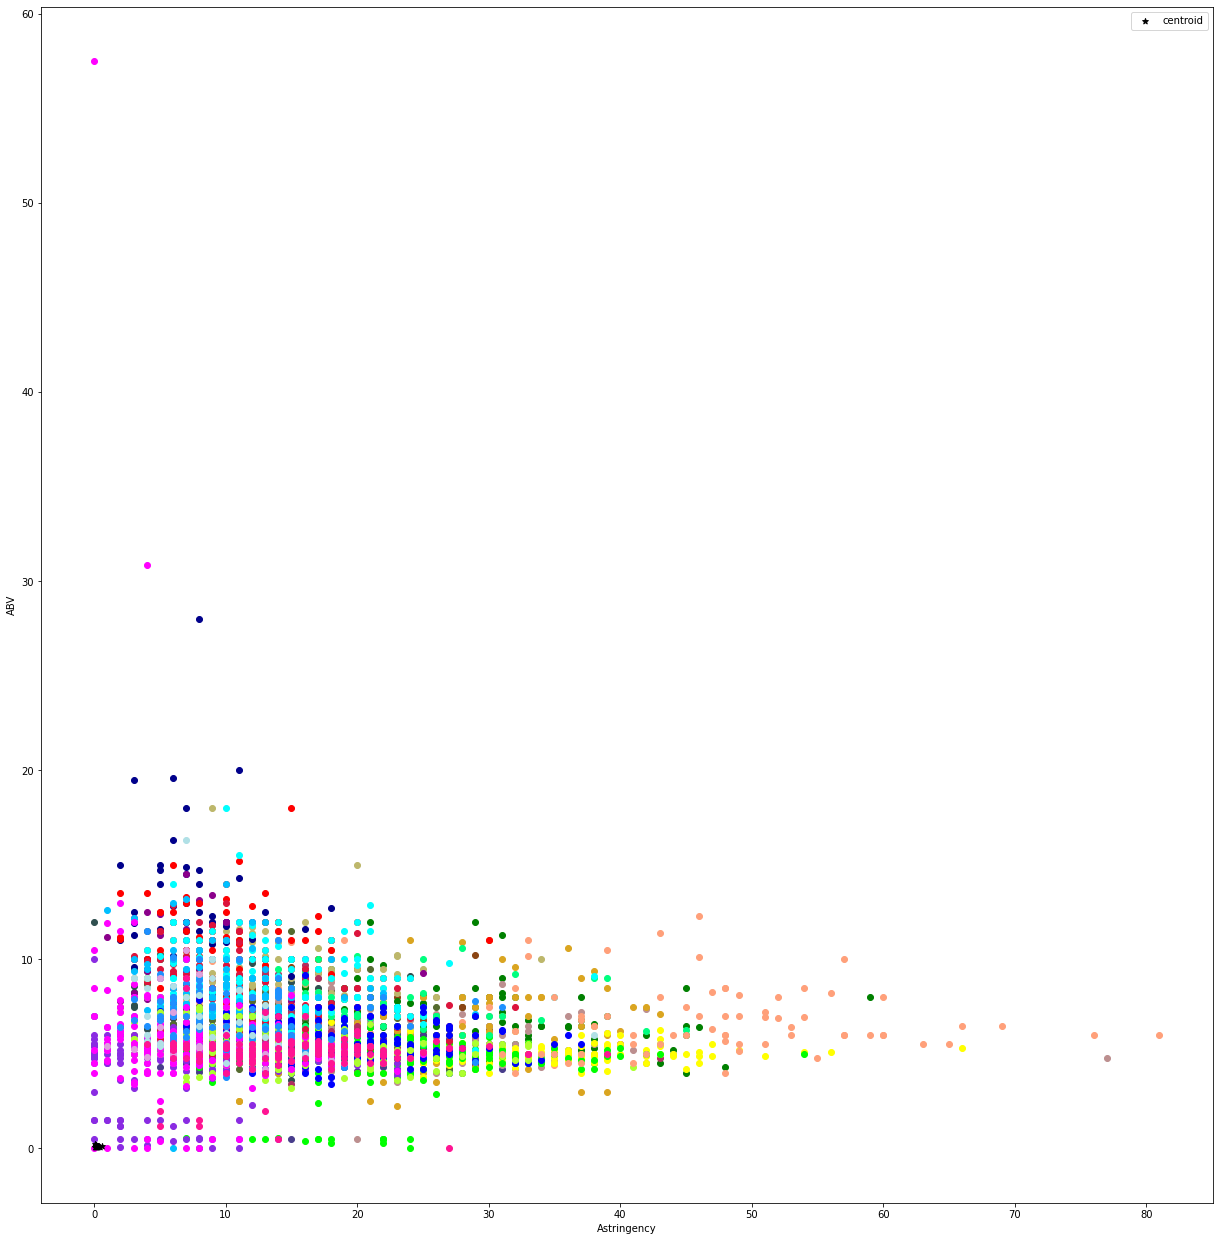

In [18]:
df_cluster_plot=df_clustering_scaled.copy(deep=True)
df_cluster_plot['clusters']=labels_for_optimal_cluster_value
clus_df_list_for_clusters=list()
color_list=['ffa07a','2f4f4f','556b2f','8b4513','483d8b','008000','bc8f8f','bdb76b',
'00008b','daa520','8b008b','b03060','ff0000','ffff00','00ff00','8a2be2','00ff7f','dc143c','00ffff','00bfff','0000ff','adff2f','ff00ff','1e90ff','dda0dd','b0e0e6',
'ff1493','ffa07a']
print(len(color_list))
color_i=0
columns_to_plot=['Astringency','ABV']
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
for cluster in range(num_clusters):
    df_for_cluster=df[df_cluster_plot.clusters==cluster]
    plt.scatter(df_for_cluster[columns_to_plot[0]],df_for_cluster[columns_to_plot[1]],color='#'+color_list[color_i])
    
    color_i+=1
    if color_i==(len(color_list)-1):
        color_i=0 

plt.scatter(cluster_centers_for_optimal_value[:,df_clustering_scaled.columns.get_loc(columns_to_plot[0])]
,cluster_centers_for_optimal_value[:,df_clustering_scaled.columns.get_loc(columns_to_plot[1])],color='black',marker='*',label='centroid')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(21, 22)
#fig.savefig('test2png.png', dpi=100)


### Classify based on cluster labels

In [24]:
num_clusters=111
#num_clusters=optimal_n_clusters_sil_analysis
#num_clusters=optimal_n_clusters_knee_locator
labels_for_optimal_cluster_value=k_means_labels_list[num_clusters-min_clusters]
labels_for_optimal_cluster_value = [str(k) for k in labels_for_optimal_cluster_value]

In [25]:
#To make sure
array = np.array(labels_for_optimal_cluster_value)
unique = np.unique(array)
num_values = len(unique)

print(num_values)

111


In [26]:
#Predictors
X = df_clustering
#Response
y = labels_for_optimal_cluster_value
# 75% train 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print('\nX train dimensions:', X_train.shape, ' X test dimensions', X_test.shape)
print('\nY train dimensions:', (len(y_train),0), ' Y test dimensions', (len(y_test),0))


X train dimensions: (2397, 14)  X test dimensions (800, 14)

Y train dimensions: (2397, 0)  Y test dimensions (800, 0)


In [27]:
models = [
    ['Logistic_Regression', LogisticRegression()],
    ['Naive_Bayes ', BernoulliNB()],
    ['kNN_Regression', KNeighborsClassifier(n_neighbors=5)],
    ['Decision_Tree', DecisionTreeClassifier(random_state=123)],
    ['Random Forest Classifier', RandomForestClassifier(n_estimators=1000)]
]

clf_acc = {}

for clf, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)

In [28]:
for clf in clf_acc:
    print("Model:",clf, '\t',"Accuracy:", clf_acc[clf])

Model: Logistic_Regression 	 Accuracy: 0.45375
Model: Naive_Bayes  	 Accuracy: 0.05875
Model: kNN_Regression 	 Accuracy: 0.77875
Model: Decision_Tree 	 Accuracy: 0.62
Model: Random Forest Classifier 	 Accuracy: 0.80375
